In [10]:
# snippets
code_snippets = [
    "import os\n\ndef greet(name):\n    return f'Hello {name}'",
    "class Person:\n    def __init__(self, name):\n        self.name = name"
]


In [11]:
# Parse Using AST
import ast

def parse_ast(code):
    tree = ast.parse(code)
    functions, classes, imports = [], [], []

    for node in ast.walk(tree):
        if isinstance(node, ast.FunctionDef):
            functions.append(node.name)
        elif isinstance(node, ast.ClassDef):
            classes.append(node.name)
        elif isinstance(node, ast.Import) or isinstance(node, ast.ImportFrom):
            for alias in node.names:
                imports.append(alias.name)

    return {
        "functions": functions,
        "classes": classes,
        "imports": imports
    }


In [17]:
# Tokenize Code
from transformers import AutoTokenizer

tokenizers = {
    "minilm": AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2"),

    # Use base tokenizer for DistilRoBERTa instead
    "distilroberta": AutoTokenizer.from_pretrained("distilroberta-base"),

    "mpnet": AutoTokenizer.from_pretrained("sentence-transformers/all-mpnet-base-v2")
}




tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [19]:
# Generate Embeddings
from sentence_transformers import SentenceTransformer

models = {
    "minilm": SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2"),
    "distilroberta": SentenceTransformer("sentence-transformers/paraphrase-distilroberta-base-v1"),
    "mpnet": SentenceTransformer("sentence-transformers/all-mpnet-base-v2")
}

def get_embeddings(snippet):
    return {
        model_name: model.encode(snippet)
        for model_name, model in models.items()
    }


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [29]:
# Compare Outputs
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


snippet = "def greet(name): return f'Hello {name}'"
embeddings = get_embeddings(snippet)

embedding_groups = {}
for name, vec in embeddings.items():
    arr = np.array(vec).squeeze()
    dim = arr.shape[0]
    if dim not in embedding_groups:
        embedding_groups[dim] = {}
    embedding_groups[dim][name] = arr

for dim, group in embedding_groups.items():
    print(f"\n Embedding dimension: {dim}")
    model_names = list(group.keys())
    vectors = list(group.values())

    sim_matrix = cosine_similarity(vectors)

    for i, row in enumerate(sim_matrix):
        print(f"{model_names[i]}: {np.round(row, 4)}")



 Embedding dimension: 384
minilm: [1.]

 Embedding dimension: 768
distilroberta: [ 1.     -0.0069]
mpnet: [-0.0069  1.    ]


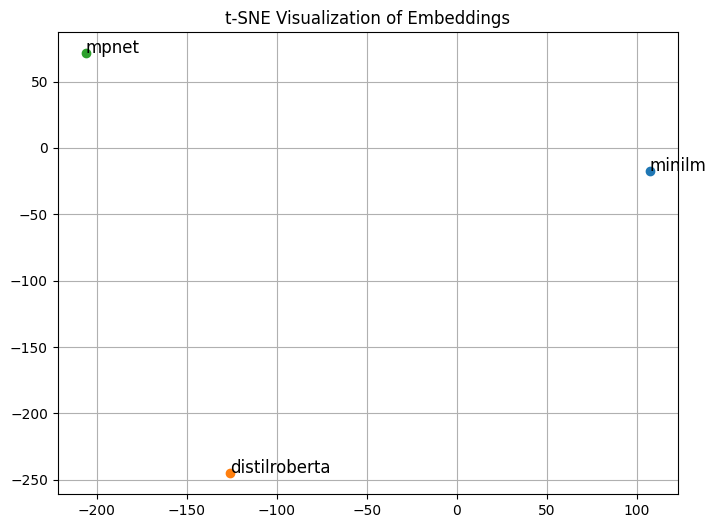

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

embedding_dict = {
    "minilm": np.random.rand(384),
    "distilroberta": np.random.rand(384),
    "mpnet": np.random.rand(384)
}

def plot_embeddings(embedding_dict):
    labels, vectors = zip(*embedding_dict.items())
    vectors = [np.array(v).squeeze() for v in vectors]

    dims = [v.shape[0] for v in vectors]
    if len(set(dims)) != 1:
        raise ValueError(f"Inconsistent embedding dimensions: {set(dims)}")

    X = np.vstack(vectors)

    perplexity = min(5, len(vectors) - 1)

    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    reduced = tsne.fit_transform(X)

    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        x, y = reduced[i]
        plt.scatter(x, y)
        plt.text(x + 0.01, y + 0.01, label, fontsize=12)
    plt.title("t-SNE Visualization of Embeddings")
    plt.grid(True)
    plt.show()

plot_embeddings(embedding_dict)
